<a href="https://colab.research.google.com/github/mmsamiei/lets-pytorch/blob/master/Q6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  CE-40959: Deep Learning

## Homework 5 - 2:  EBGAN

The goal is to train a GAN with an auto-encoder as its discriminator.
For further information read the [paper of EBGAN](https://arxiv.org/abs/1609.03126).

Good luck

In [0]:
import numpy as np

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
# MNIST Dataset
original_train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
original_test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=True)

In [0]:
CUDA = True
BATCH_SIZE = 64

In [0]:
# Define Train loader
train_tensors = original_train_dataset.data.float() / 255
test_tensors = original_test_dataset.data.float() / 255

train_dataset = torch.utils.data.TensorDataset(train_tensors, original_train_dataset.targets)
test_dataset = torch.utils.data.TensorDataset(test_tensors, original_test_dataset.targets)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def show(image_batch, rows=1):
    # Set Plot dimensions
    cols = np.ceil(image_batch.shape[0] / rows)
    plt.rcParams['figure.figsize'] = (0.0 + cols, 0.0 + rows) # set default size of plots
    
    for i in range(image_batch.shape[0]):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image_batch[i], cmap="gray", vmin=0, vmax=1)
        plt.axis('off')
    plt.show()

---

In [8]:
class AutoEncoderMSE(nn.Module):
    def __init__(self, input_dim, encoder_dims, decoder_dims, dropout_rate=0.5):
        super(AutoEncoderMSE, self).__init__()
        
        self.input_dim = input_dim
        ########################## TODO ##########################
        # self.input_dropout must be a dropout module with p=dropout_rate
        self.input_dropout = nn.Dropout(dropout_rate)
        ######################## END TODO ########################
        
        
        # Encoder part
        encoder_layers = []
        ########################## TODO ##########################
        # Define encoder layers and add them to `encoder_layers`
        # Use nn.LeakyReLU(0.2) for activation functions
        temp = encoder_dims
        temp = [input_dim] + temp
        for i in range(len(temp) - 1):
            encoder_layers.append(nn.Linear(temp[i], temp[i + 1]))
            encoder_layers.append(nn.LeakyReLU(0.2))
        
        ecoder_hidden_sizes = temp
        ######################## END TODO ########################
        self.encoder = nn.Sequential(*encoder_layers)
        
        last_encoder_dim = ([input_dim] + encoder_dims)[-1]

        # Decoder part
        decoder_layers = []
        ########################## TODO ##########################
        # Define decoder layers and add them to `decoder_layers`
        # Use nn.LeakyReLU(0.2) for activation functions
        # Last layer does not need any activation function
        decoder_layers.append(nn.Linear(last_encoder_dim, decoder_dims[0]))
        temp = decoder_dims
        temp = temp + [input_dim]
        for i in range(len(temp) - 1):
            decoder_layers.append(nn.LeakyReLU(0.2))
            decoder_layers.append(nn.Linear(temp[i], temp[i + 1]))
        ######################## END TODO ########################
        self.decoder = nn.Sequential(*decoder_layers)
        
        self.MSE = nn.MSELoss(reduction='sum', reduce = False)

    def forward(self, x):
        ########################## TODO ##########################
        # Complete the flow
        # x > dropout > encoder > h > decoder > output > mse
        # Note that mse.shape = (batch_size, )
        # DO NOT FORGET TO ADD DROPOUT LAYER
        temp = x
        temp = self.input_dropout(temp)
        temp = self.encoder(temp)
        temp = self.decoder(temp)
        temp = self.MSE(x, temp)
        temp = torch.sum(temp, dim=1)
        return temp
        ######################## END TODO ########################

      
discriminator = AutoEncoderMSE(784, [256, 128, 64], [128, 256], dropout_rate=0.5)

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


In [0]:
generator = nn.Sequential(
    nn.Linear(128, 128),
    nn.LeakyReLU(0.2),
    nn.Linear(128, 256),
    nn.Dropout(),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 512),
    nn.LeakyReLU(0.2),
    nn.Linear(512, 784),
    nn.Sigmoid()
)

In [10]:
testi = torch.randn(10, 784)
discriminator(testi)

tensor([746.3903, 727.2588, 813.9340, 793.9760, 771.3785, 709.7970, 855.3560,
        805.3907, 820.1899, 849.2799], grad_fn=<SumBackward2>)

In [0]:
if CUDA:
  discriminator.cuda()
  generator.cuda()

In [0]:
LEARNING_RATE_D = 0.0002
LEARNING_RATE_G = 0.0002

opt_D = optim.Adam(discriminator.parameters(), lr=LEARNING_RATE_D)
opt_G = optim.Adam(generator.parameters(), lr=LEARNING_RATE_G)

In [0]:
N_EPOCH = 100

epoch: 0 	 last batch loss D: 354.83465576171875 	 last batch loss G: 657.5330810546875


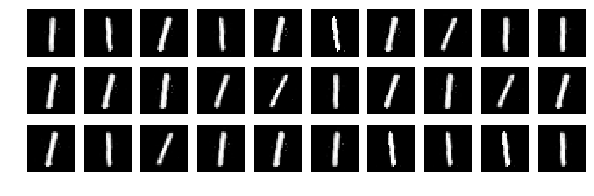

epoch: 1 	 last batch loss D: 322.7830505371094 	 last batch loss G: 618.5582885742188


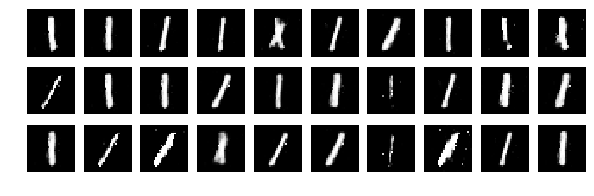

epoch: 2 	 last batch loss D: 347.0424499511719 	 last batch loss G: 598.3829345703125


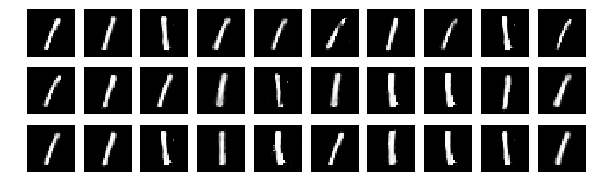

epoch: 3 	 last batch loss D: 333.3885803222656 	 last batch loss G: 553.5855712890625


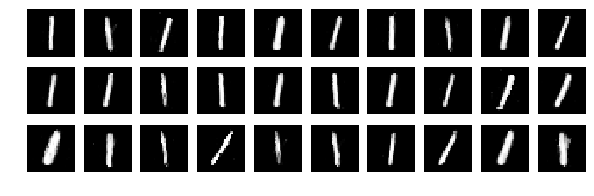

epoch: 4 	 last batch loss D: 383.7174072265625 	 last batch loss G: 560.1884765625


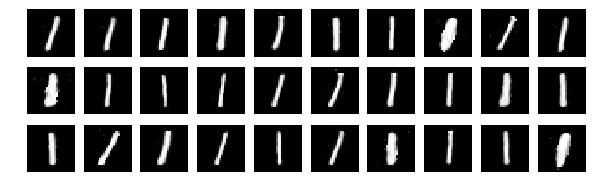

epoch: 5 	 last batch loss D: 365.1627197265625 	 last batch loss G: 633.3162841796875


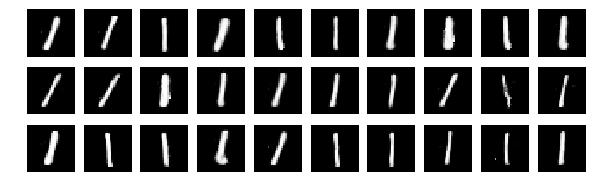

epoch: 6 	 last batch loss D: 377.3785400390625 	 last batch loss G: 595.512451171875


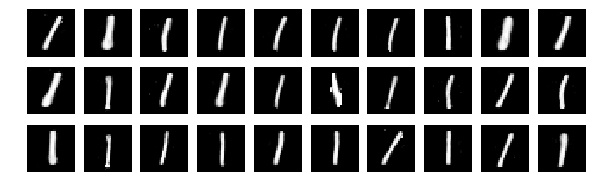

epoch: 7 	 last batch loss D: 389.5765380859375 	 last batch loss G: 572.7255859375


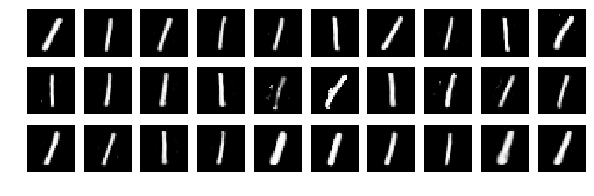

epoch: 8 	 last batch loss D: 388.6101379394531 	 last batch loss G: 558.5361328125


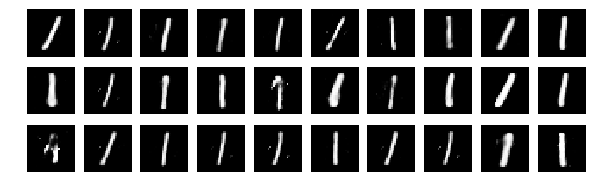

epoch: 9 	 last batch loss D: 339.9190673828125 	 last batch loss G: 632.0123291015625


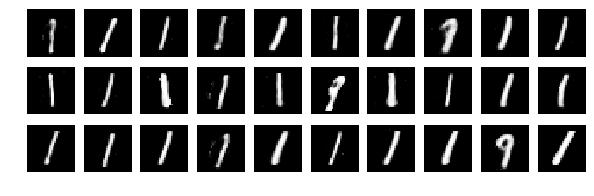

epoch: 10 	 last batch loss D: 320.516357421875 	 last batch loss G: 583.1260986328125


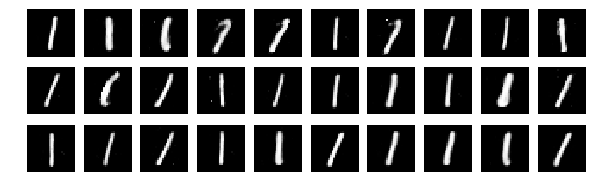

epoch: 11 	 last batch loss D: 368.1741943359375 	 last batch loss G: 584.329833984375


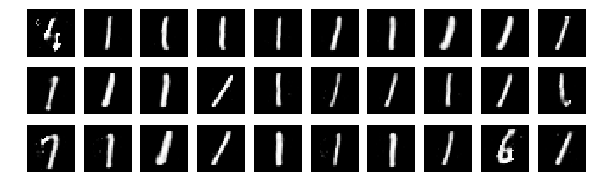

epoch: 12 	 last batch loss D: 363.7807922363281 	 last batch loss G: 557.7808837890625


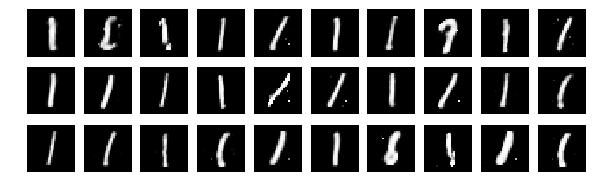

epoch: 13 	 last batch loss D: 354.90362548828125 	 last batch loss G: 559.6728515625


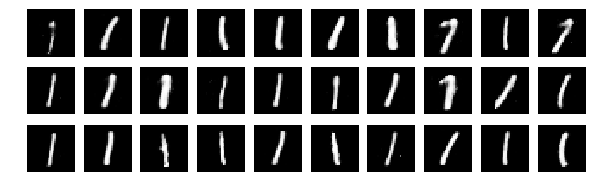

epoch: 14 	 last batch loss D: 350.20513916015625 	 last batch loss G: 566.6842041015625


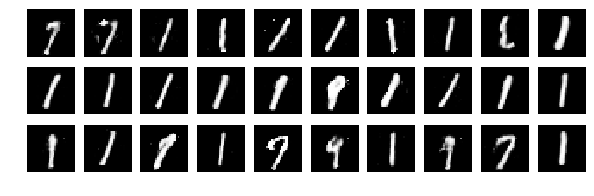

epoch: 15 	 last batch loss D: 409.38568115234375 	 last batch loss G: 533.4076538085938


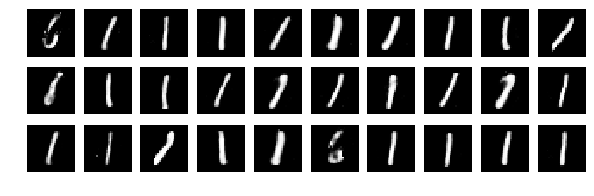

epoch: 16 	 last batch loss D: 354.92974853515625 	 last batch loss G: 557.1929931640625


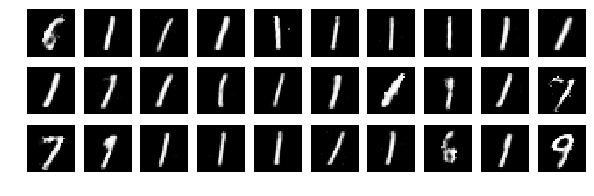

epoch: 17 	 last batch loss D: 375.8050842285156 	 last batch loss G: 529.8912353515625


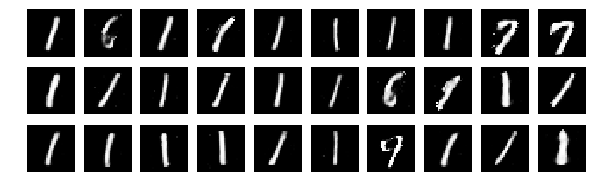

epoch: 18 	 last batch loss D: 373.3524169921875 	 last batch loss G: 565.809814453125


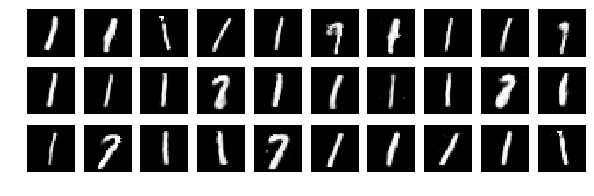

epoch: 19 	 last batch loss D: 359.661865234375 	 last batch loss G: 548.8955078125


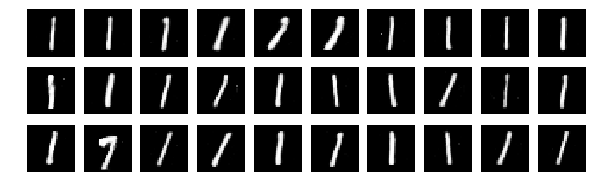

epoch: 20 	 last batch loss D: 361.98114013671875 	 last batch loss G: 575.6361083984375


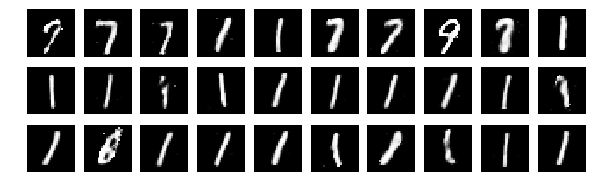

epoch: 21 	 last batch loss D: 383.453857421875 	 last batch loss G: 565.8529663085938


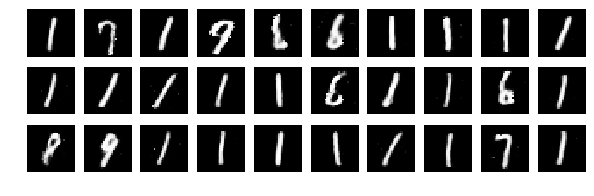

epoch: 22 	 last batch loss D: 373.7560729980469 	 last batch loss G: 542.527587890625


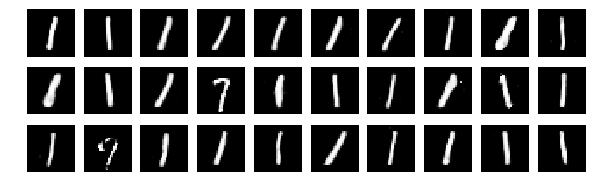

epoch: 23 	 last batch loss D: 382.0626220703125 	 last batch loss G: 561.5166015625


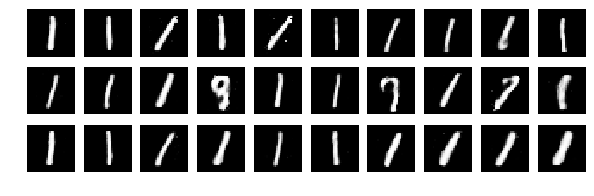

epoch: 24 	 last batch loss D: 352.44140625 	 last batch loss G: 567.0972900390625


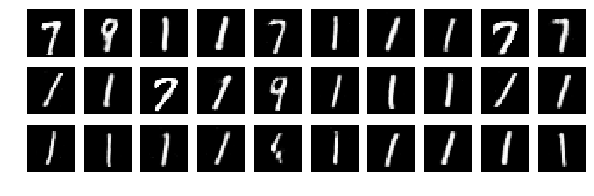

epoch: 25 	 last batch loss D: 364.5285949707031 	 last batch loss G: 588.8055419921875


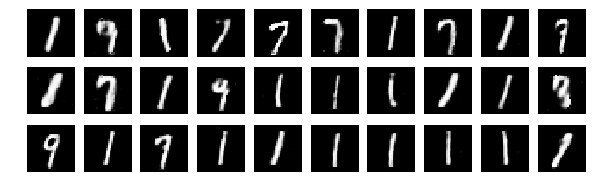

epoch: 26 	 last batch loss D: 413.3550109863281 	 last batch loss G: 552.0723876953125


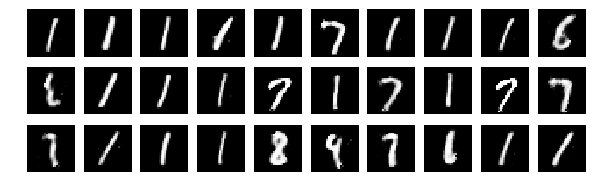

epoch: 27 	 last batch loss D: 348.96673583984375 	 last batch loss G: 543.2569580078125


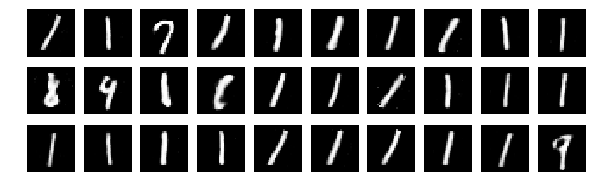

epoch: 28 	 last batch loss D: 378.92852783203125 	 last batch loss G: 534.6873779296875


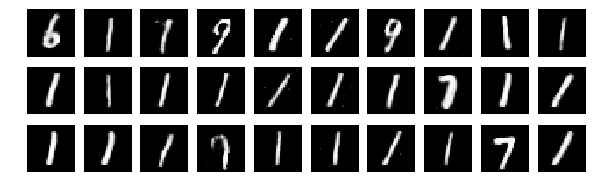

epoch: 29 	 last batch loss D: 373.6153564453125 	 last batch loss G: 554.368408203125


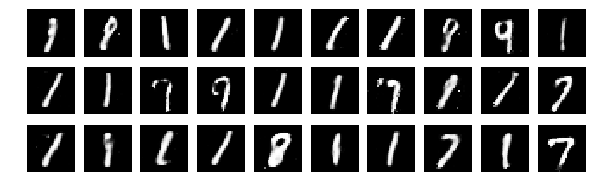

epoch: 30 	 last batch loss D: 372.7823486328125 	 last batch loss G: 554.5421752929688


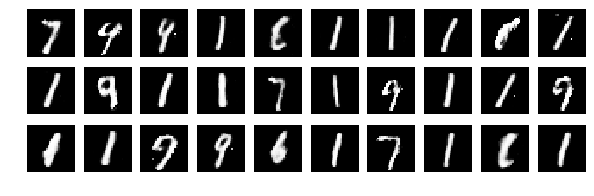

epoch: 31 	 last batch loss D: 410.0623779296875 	 last batch loss G: 565.1549072265625


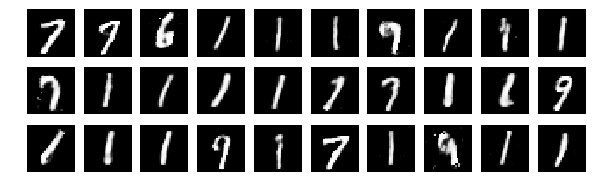

epoch: 32 	 last batch loss D: 406.293212890625 	 last batch loss G: 513.3597412109375


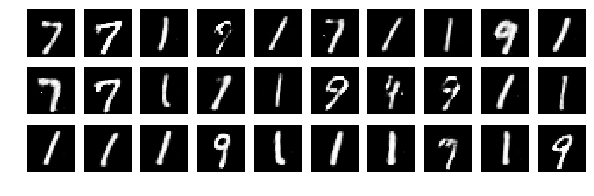

epoch: 33 	 last batch loss D: 355.54815673828125 	 last batch loss G: 548.492431640625


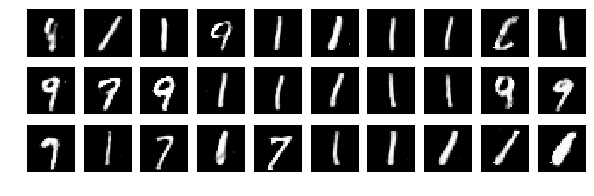

epoch: 34 	 last batch loss D: 378.57379150390625 	 last batch loss G: 556.3788452148438


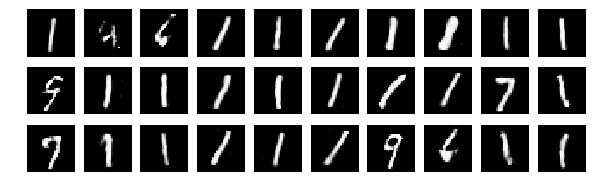

epoch: 35 	 last batch loss D: 389.44793701171875 	 last batch loss G: 572.843994140625


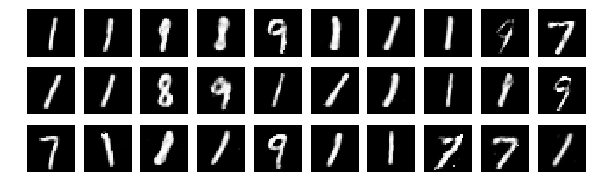

epoch: 36 	 last batch loss D: 389.5396423339844 	 last batch loss G: 513.290283203125


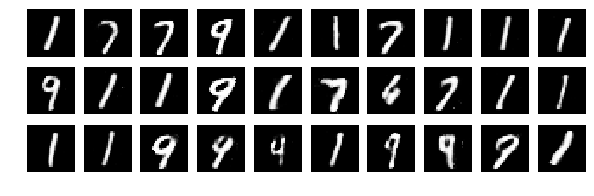

epoch: 37 	 last batch loss D: 364.7330322265625 	 last batch loss G: 551.5791015625


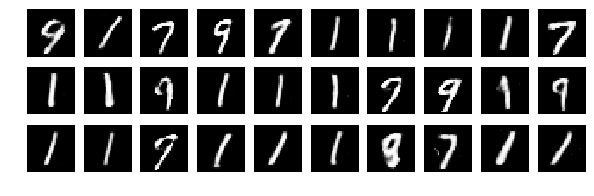

epoch: 38 	 last batch loss D: 409.3576965332031 	 last batch loss G: 555.93798828125


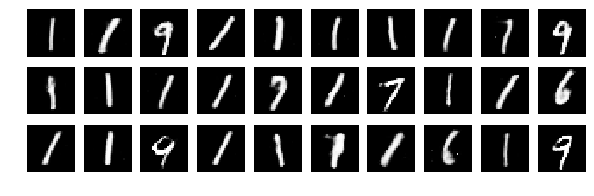

epoch: 39 	 last batch loss D: 371.1075744628906 	 last batch loss G: 543.855224609375


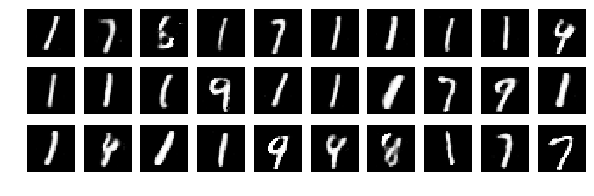

epoch: 40 	 last batch loss D: 360.44329833984375 	 last batch loss G: 550.5406494140625


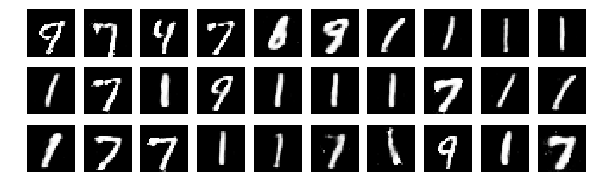

epoch: 41 	 last batch loss D: 384.973388671875 	 last batch loss G: 546.493896484375


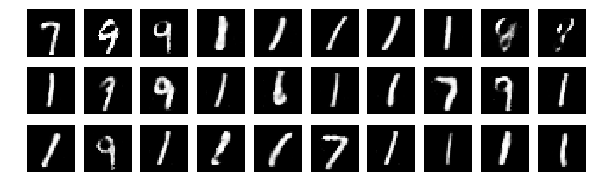

epoch: 42 	 last batch loss D: 403.4794616699219 	 last batch loss G: 528.0121459960938


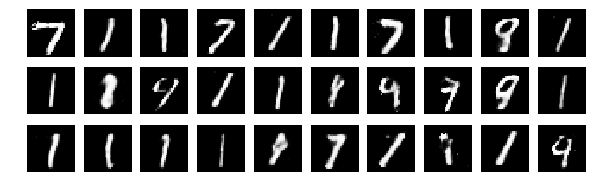

epoch: 43 	 last batch loss D: 390.79620361328125 	 last batch loss G: 542.3026123046875


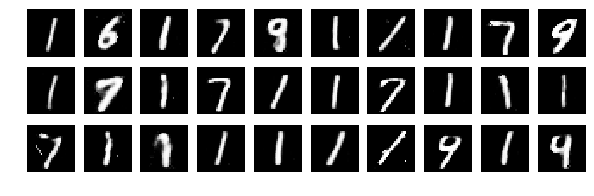

epoch: 44 	 last batch loss D: 413.25164794921875 	 last batch loss G: 551.3663940429688


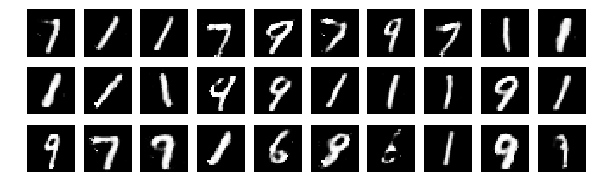

epoch: 45 	 last batch loss D: 404.8750305175781 	 last batch loss G: 565.8980102539062


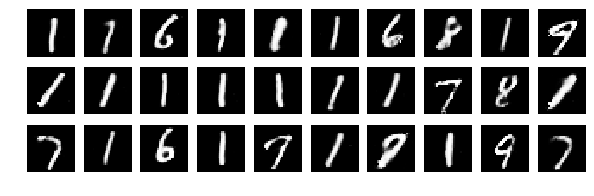

epoch: 46 	 last batch loss D: 416.7772216796875 	 last batch loss G: 513.0105590820312


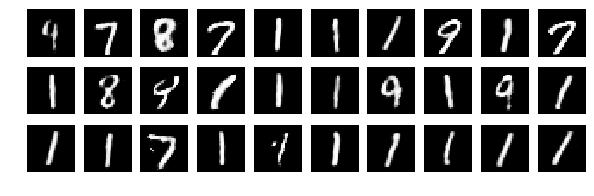

epoch: 47 	 last batch loss D: 387.3887939453125 	 last batch loss G: 503.23919677734375


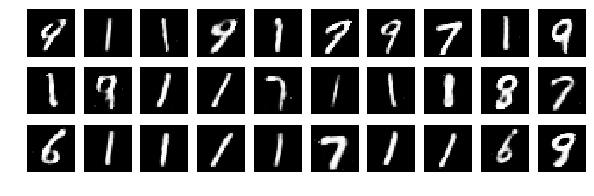

epoch: 48 	 last batch loss D: 413.3883972167969 	 last batch loss G: 578.0140380859375


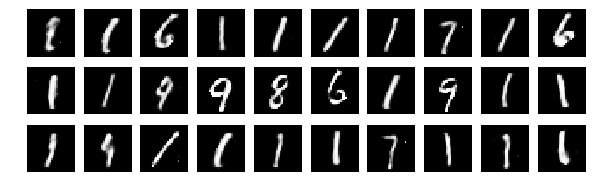

epoch: 49 	 last batch loss D: 397.5809631347656 	 last batch loss G: 515.8735961914062


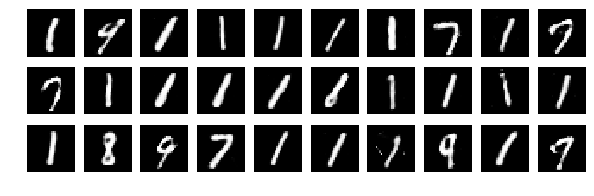

epoch: 50 	 last batch loss D: 404.8624267578125 	 last batch loss G: 505.4195556640625


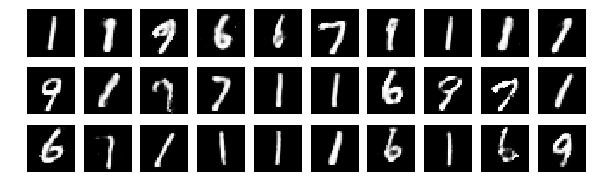

epoch: 51 	 last batch loss D: 405.3182678222656 	 last batch loss G: 513.8795776367188


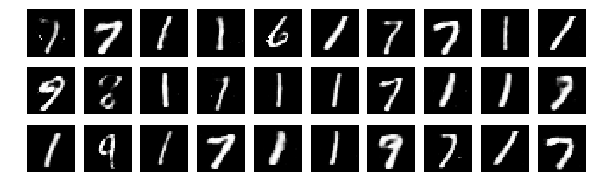

epoch: 52 	 last batch loss D: 422.05548095703125 	 last batch loss G: 517.3423461914062


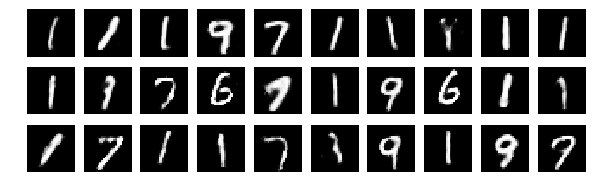

epoch: 53 	 last batch loss D: 393.9075012207031 	 last batch loss G: 575.5498046875


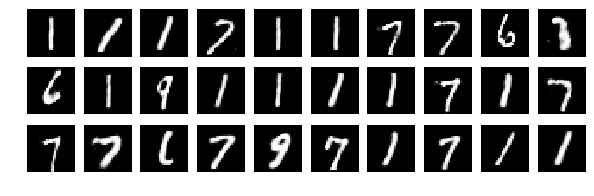

epoch: 54 	 last batch loss D: 423.72125244140625 	 last batch loss G: 553.9208374023438


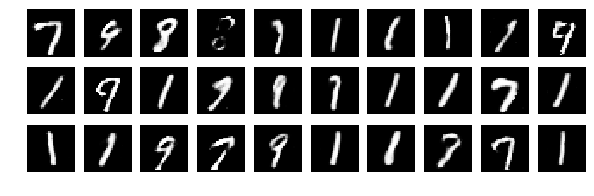

epoch: 55 	 last batch loss D: 396.2023010253906 	 last batch loss G: 553.131591796875


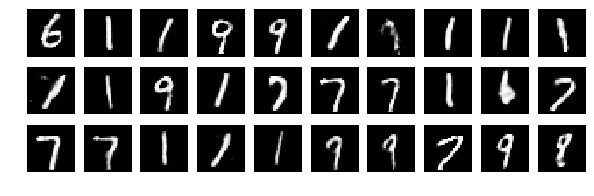

epoch: 56 	 last batch loss D: 380.28076171875 	 last batch loss G: 540.9591064453125


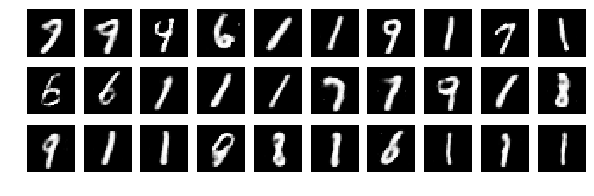

epoch: 57 	 last batch loss D: 396.26751708984375 	 last batch loss G: 562.253662109375


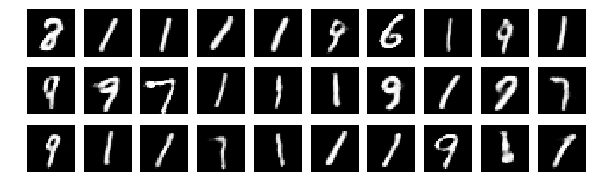

epoch: 58 	 last batch loss D: 386.55615234375 	 last batch loss G: 595.6749267578125


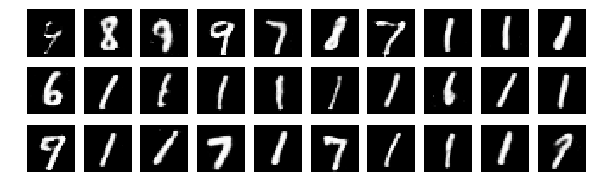

epoch: 59 	 last batch loss D: 427.41693115234375 	 last batch loss G: 491.9899597167969


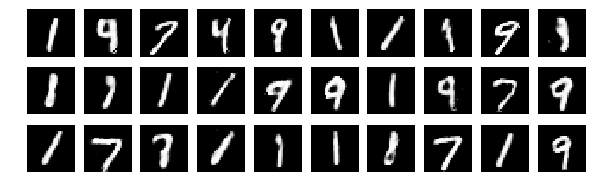

epoch: 60 	 last batch loss D: 404.0400695800781 	 last batch loss G: 531.527587890625


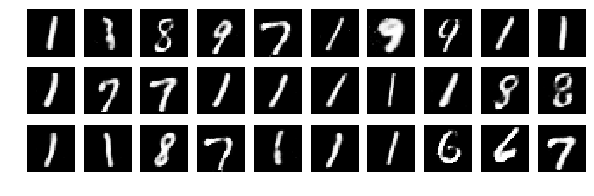

epoch: 61 	 last batch loss D: 363.6431884765625 	 last batch loss G: 546.63720703125


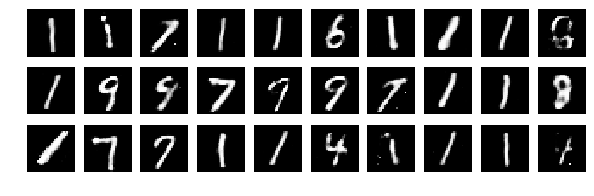

epoch: 62 	 last batch loss D: 413.38311767578125 	 last batch loss G: 526.034912109375


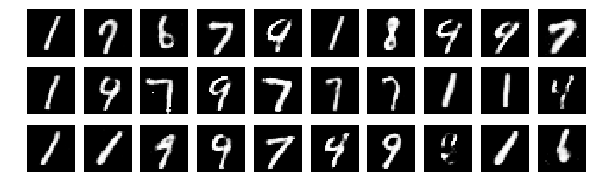

epoch: 63 	 last batch loss D: 393.76812744140625 	 last batch loss G: 585.258544921875


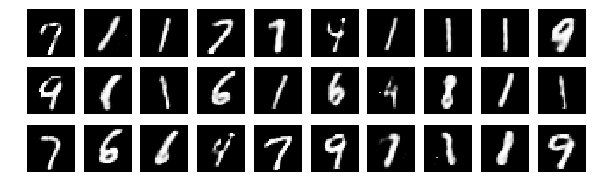

epoch: 64 	 last batch loss D: 369.81756591796875 	 last batch loss G: 568.5040283203125


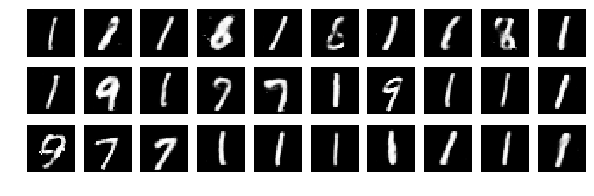

epoch: 65 	 last batch loss D: 412.73162841796875 	 last batch loss G: 575.1790161132812


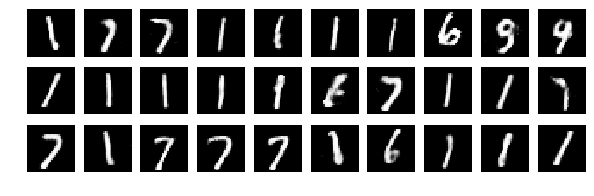

epoch: 66 	 last batch loss D: 415.46923828125 	 last batch loss G: 512.16162109375


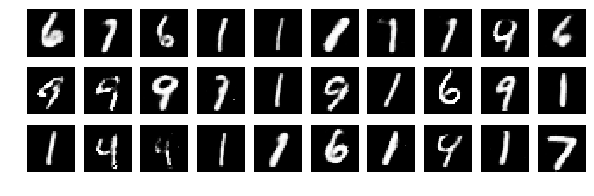

epoch: 67 	 last batch loss D: 444.6558532714844 	 last batch loss G: 488.9932861328125


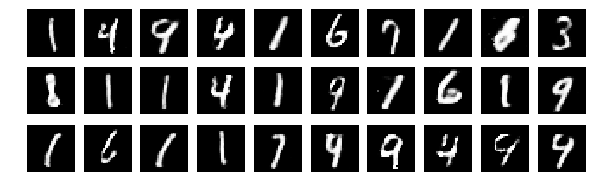

epoch: 68 	 last batch loss D: 374.5315856933594 	 last batch loss G: 548.717041015625


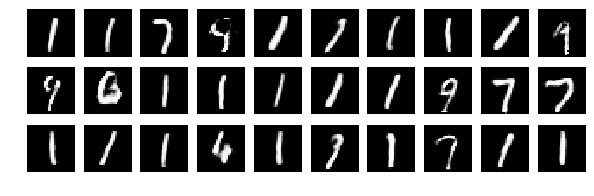

epoch: 69 	 last batch loss D: 459.0283508300781 	 last batch loss G: 497.2603759765625


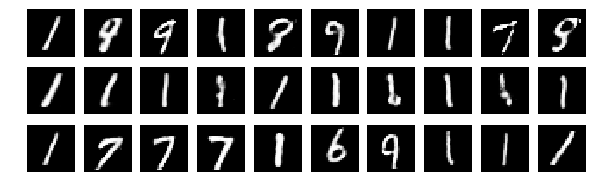

epoch: 70 	 last batch loss D: 401.1438293457031 	 last batch loss G: 537.4083251953125


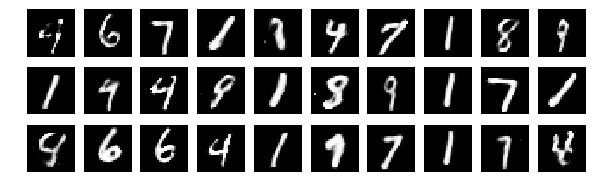

epoch: 71 	 last batch loss D: 385.2627258300781 	 last batch loss G: 525.4197387695312


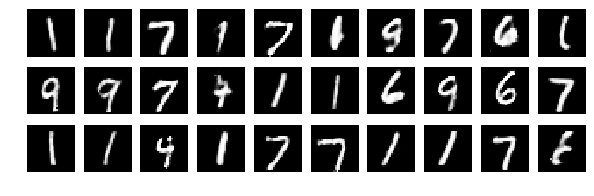

epoch: 72 	 last batch loss D: 417.63153076171875 	 last batch loss G: 497.18084716796875


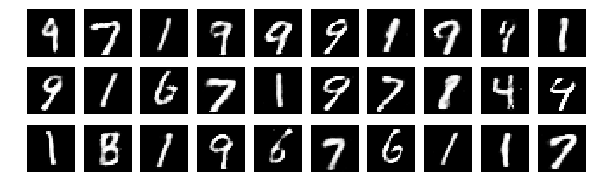

epoch: 73 	 last batch loss D: 381.18316650390625 	 last batch loss G: 557.5510864257812


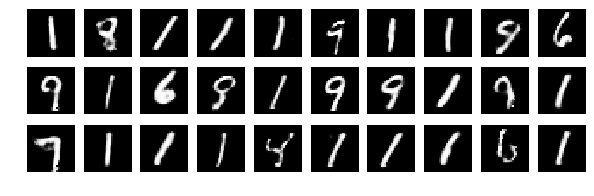

epoch: 74 	 last batch loss D: 428.2817077636719 	 last batch loss G: 532.133056640625


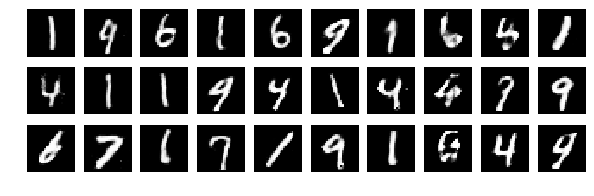

epoch: 75 	 last batch loss D: 451.6822204589844 	 last batch loss G: 502.6995849609375


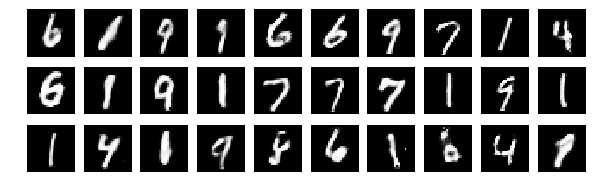

epoch: 76 	 last batch loss D: 399.70849609375 	 last batch loss G: 518.4260864257812


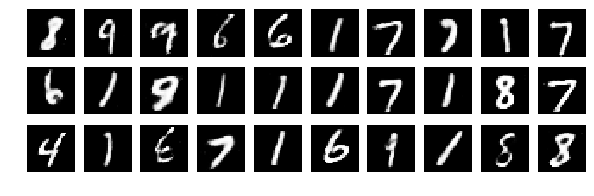

epoch: 77 	 last batch loss D: 406.8603515625 	 last batch loss G: 525.9810180664062


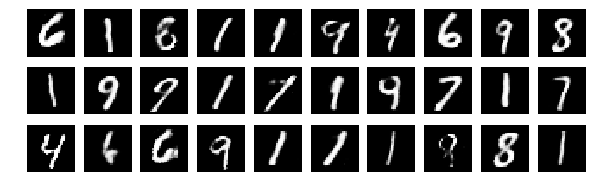

epoch: 78 	 last batch loss D: 368.7978515625 	 last batch loss G: 554.4866943359375


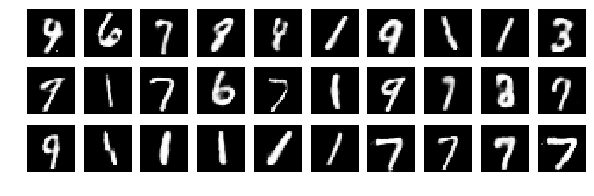

epoch: 79 	 last batch loss D: 426.092529296875 	 last batch loss G: 542.123779296875


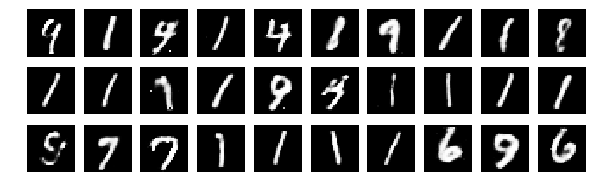

epoch: 80 	 last batch loss D: 453.62066650390625 	 last batch loss G: 527.868408203125


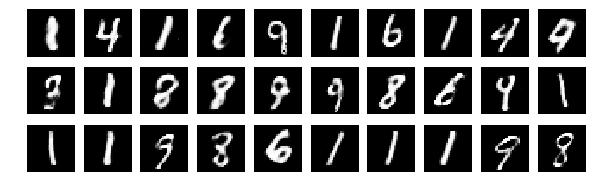

epoch: 81 	 last batch loss D: 426.43939208984375 	 last batch loss G: 515.0880737304688


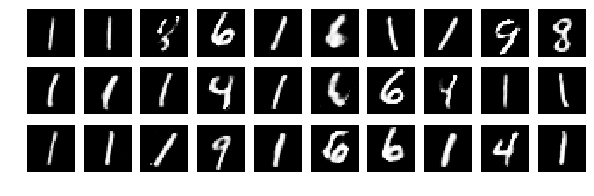

epoch: 82 	 last batch loss D: 424.0707702636719 	 last batch loss G: 523.591064453125


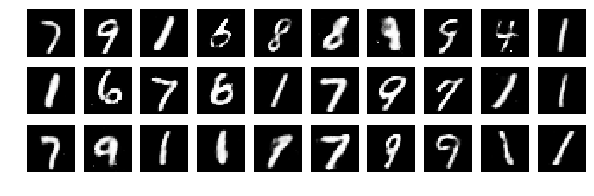

epoch: 83 	 last batch loss D: 437.76678466796875 	 last batch loss G: 536.476318359375


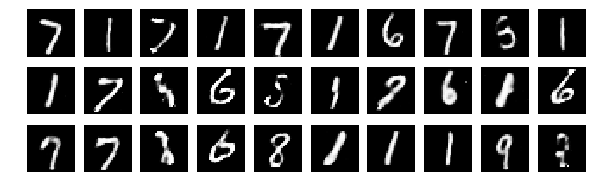

epoch: 84 	 last batch loss D: 441.3786926269531 	 last batch loss G: 541.5328369140625


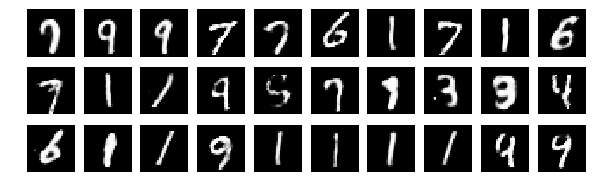

epoch: 85 	 last batch loss D: 413.6873474121094 	 last batch loss G: 567.1650390625


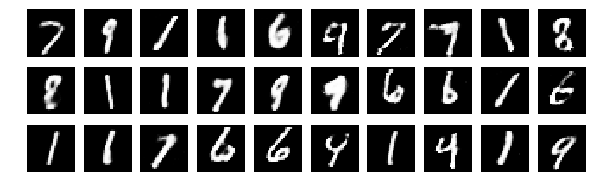

epoch: 86 	 last batch loss D: 417.795166015625 	 last batch loss G: 578.929931640625


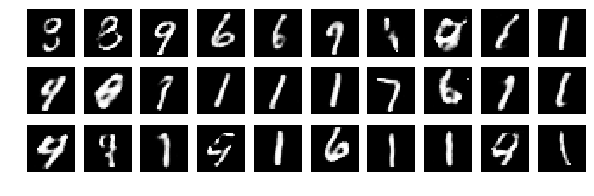

epoch: 87 	 last batch loss D: 418.02392578125 	 last batch loss G: 541.6112060546875


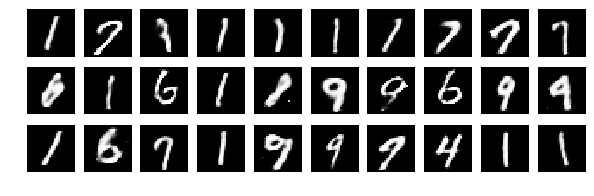

epoch: 88 	 last batch loss D: 411.50311279296875 	 last batch loss G: 540.82177734375


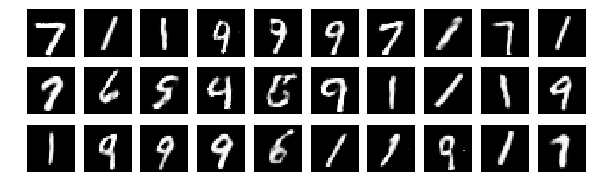

epoch: 89 	 last batch loss D: 459.87109375 	 last batch loss G: 524.9227294921875


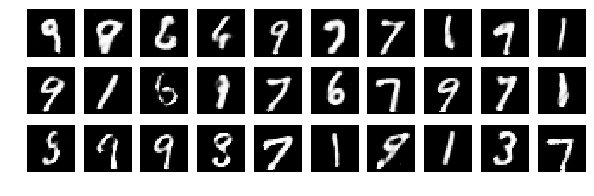

epoch: 90 	 last batch loss D: 429.1973876953125 	 last batch loss G: 557.610595703125


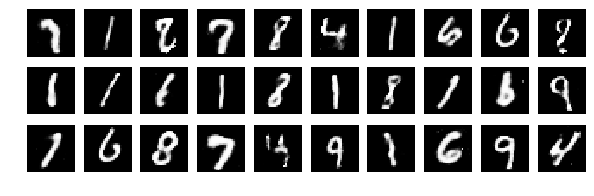

epoch: 91 	 last batch loss D: 434.76458740234375 	 last batch loss G: 532.1046142578125


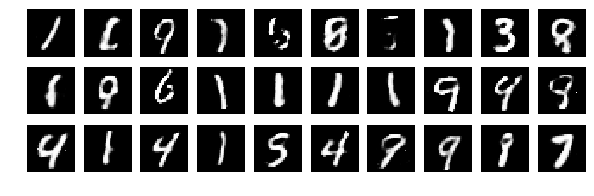

epoch: 92 	 last batch loss D: 427.97723388671875 	 last batch loss G: 538.275634765625


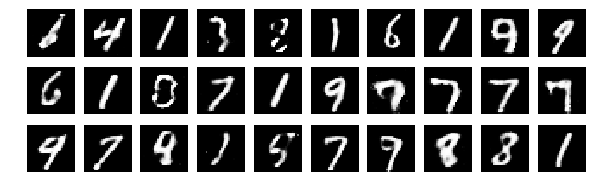

epoch: 93 	 last batch loss D: 424.5867919921875 	 last batch loss G: 572.9829711914062


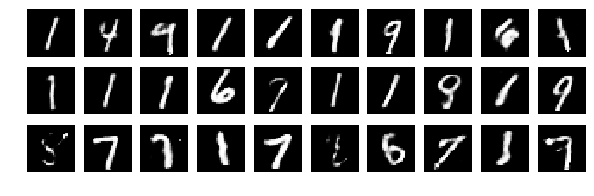

epoch: 94 	 last batch loss D: 440.6507568359375 	 last batch loss G: 530.2662963867188


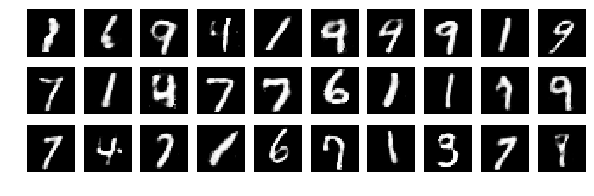

epoch: 95 	 last batch loss D: 449.58984375 	 last batch loss G: 564.1940307617188


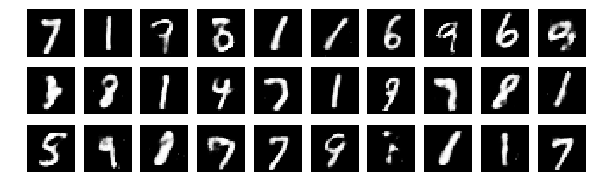

epoch: 96 	 last batch loss D: 457.2205810546875 	 last batch loss G: 534.50634765625


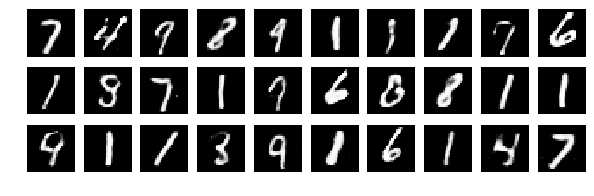

epoch: 97 	 last batch loss D: 405.9111328125 	 last batch loss G: 538.9603271484375


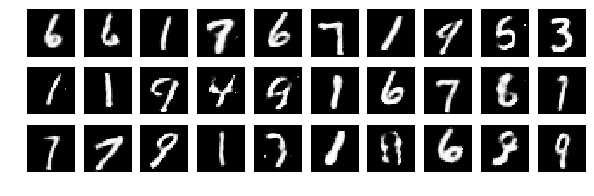

epoch: 98 	 last batch loss D: 467.2802734375 	 last batch loss G: 504.69342041015625


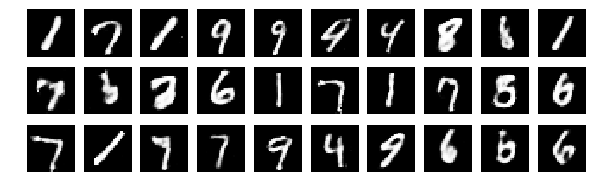

epoch: 99 	 last batch loss D: 398.3794250488281 	 last batch loss G: 572.2720947265625


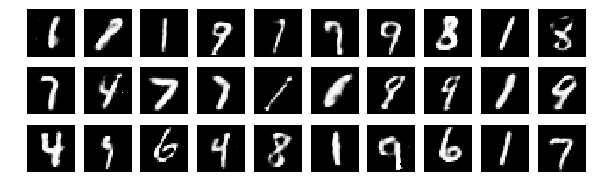

In [16]:
m = 16

for epoch in range(N_EPOCH):
    for i, (img, label) in enumerate(train_loader):
        img = img.flatten(start_dim=1)

        real_img = img
        if CUDA:
            real_img = real_img.cuda()

        z = torch.randn(img.shape[0], 128)
        if CUDA:
            z = z.cuda()
        fake_img = generator(z)

        # Discriminator Part
        opt_D.zero_grad()
        ########################## TODO ##########################
        # Define loss for discriminator
        D_real_loss = discriminator(real_img)
        D_fake_loss = discriminator(fake_img)
        margin = 16
        loss_d = D_real_loss + torch.clamp(margin - D_fake_loss, min=0)
        loss_d = loss_d.sum()
        ######################## END TODO ########################
        loss_d.backward(retain_graph=True)
        opt_D.step()
        
        # Generator Part
        opt_G.zero_grad()
        ########################## TODO ##########################
        # Define loss for generator
        loss_g = D_fake_loss
        loss_g = loss_g.sum()
        ######################## END TODO ########################
        loss_g.backward()
        opt_G.step()
        

    
    print("epoch: {} \t last batch loss D: {} \t last batch loss G: {}".format(epoch, loss_d.item(), loss_g.item()))
    imgs_to_show = fake_img[:30].view(-1, 28, 28).detach().cpu().numpy()
    show(imgs_to_show, rows=3)
